In [2]:
!pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Add synthetic AI usage column (0 to 10 hours per week)
np.random.seed(42)
df['ai_tool_usage_hours'] = np.random.randint(0, 11, size=len(df))

# Show updated data
df[['math score', 'reading score', 'writing score', 'ai_tool_usage_hours']].head()


,math score,reading score,writing score,ai_tool_usage_hours
0,72,72,74,6
1,69,90,88,3
2,90,95,93,10
3,47,57,44,7
4,76,78,75,4


In [4]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass_fail'] = df['avg_score'].apply(lambda x: 1 if x >= 50 else 0)


df.drop(['avg_score'], axis=1, inplace=True)

df[['pass_fail', 'ai_tool_usage_hours']].head()

,pass_fail,ai_tool_usage_hours
0,1,6
1,1,3
2,1,10
3,0,7
4,1,4


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df.drop(['pass_fail'], axis=1), drop_first=True)
X = df_encoded
y = df['pass_fail']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.98      0.98       200



In [8]:
def symbolic_rules(row):
    rules = []

    if row['ai_tool_usage_hours'] >= 7:
        rules.append("High AI usage likely improved learning")
    elif row['ai_tool_usage_hours'] <= 2:
        rules.append("Low AI usage may limit improvement")

    if row['parental level of education'] in ['associate\'s degree', 'bachelor\'s degree', 'master\'s degree']:
        rules.append("Parental education supports better outcomes")

    if row['lunch'] == 'standard':
        rules.append("Standard lunch linked with higher performance")

    return "; ".join(rules)


In [9]:
sample = df.iloc[0:5]
sample_encoded = pd.get_dummies(sample.drop('pass_fail', axis=1), drop_first=True)
sample_encoded = sample_encoded.reindex(columns=X.columns, fill_value=0)
sample_scaled = scaler.transform(sample_encoded)
sample_preds = model.predict(sample_scaled)

for i, row in sample.iterrows():
    print(f"\nSample #{i+1}")
    print("Prediction:", "Pass" if sample_preds[i] == 1 else "Fail")
    print("Symbolic Explanation:", symbolic_rules(row))



Sample #1
Prediction: Pass
Symbolic Explanation: Parental education supports better outcomes; Standard lunch linked with higher performance

Sample #2
Prediction: Pass
Symbolic Explanation: Standard lunch linked with higher performance

Sample #3
Prediction: Pass
Symbolic Explanation: High AI usage likely improved learning; Parental education supports better outcomes; Standard lunch linked with higher performance

Sample #4
Prediction: Fail
Symbolic Explanation: High AI usage likely improved learning; Parental education supports better outcomes

Sample #5
Prediction: Pass
Symbolic Explanation: Standard lunch linked with higher performance


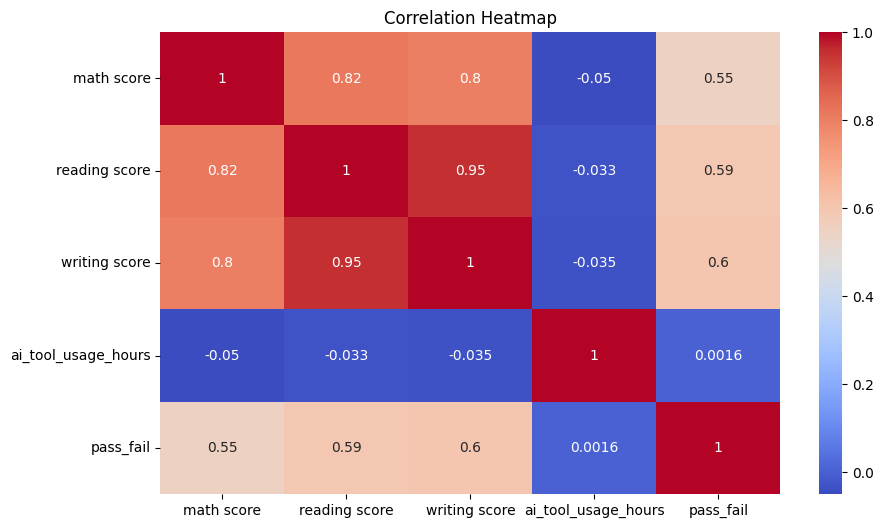

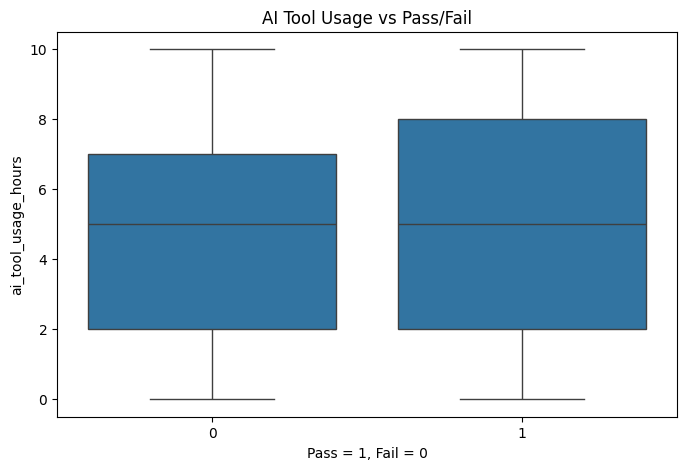

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='pass_fail', y='ai_tool_usage_hours', data=df)
plt.title("AI Tool Usage vs Pass/Fail")
plt.xlabel("Pass = 1, Fail = 0")
plt.show()